In [1]:
!pip install tensorflow

In [2]:
!pip install yfinance

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns

import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers



  #
  #model.add(Conv2D(filters=13, kernel_size=3, activation='relu', input_shape=(13,8,8,1)))
  model.add(layers.Dense(8,activation='relu', input_shape=(4,)))
  model.add(layers.Dense(8, activation='relu'))
  #model.add(layers.Dense(7, activation='relu'))
  #model.add(Dense(8, activation='relu'))

  layer = layers.Dense(3)
  layer.weights

  #model.add(Conv2D(filters=13, kernel_size=3, activation='relu', input_shape=(13,13, 1)))
  #model.add(MaxPooling2D(pool_size=2))
  #model.add(Conv2D(3, activation='relu'))
  #model.add(MaxPooling2D(pool_size=2))
  #model.add(Dropout(0.2))
  #model.add(Flatten())
  #model.add(Dense(32, activation='relu'))




In [16]:
cvscores = 0

def modelPredict(X, y, test, true):
# create the model, fit, predict
  model = Sequential((Dense(units=8, input_shape=[1])))
  #model.add(keras.Input(shape=(8,14,1)))
  #model.add(Conv2D(filters=14, kernel_size=3, activation='relu', input_shape=(14,8,8,1)))
  #model.add(layers.Conv2D(8, 3, strides=2, activation='relu'))
  #model.add(layers.Conv2D(8,3, activation='relu'))
  #model.add(layers.MaxPooling2D(3))
  #model.summary()
  model.compile(optimizer=Adam(learning_rate=1.0), loss='mean_squared_error')
  model.fit(X, y, epochs=150)
  cvscores = model.predict(test)
  print('I Predict : ', model.predict(test))
  return 0

def getStockPrices(s):
  v_data = yf.Ticker(s)
  v_info = v_data.history()
  v_info.plot.line(y="Close", use_index=True)
  v_info["Target"] = v_info.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
  return v_info

def chartprices(r):
  sns.lineplot(x=r.index, y='Open', data=r)
  return 0

def splitData(prices):
  from sklearn.model_selection import train_test_split
  import numpy
  X = np.array(prices['Open'], dtype='float32')
  y = np.array(prices['Close'], dtype='float32')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
  return X_train, X_test, y_train, y_test

In [17]:
def main():
  prices = getStockPrices('DIS')
  chartprices(prices)
  X_train, X_test, y_train, y_test = splitData(prices)
  modelPredict(X_train, y_train, X_test, y_test)
  return 0

Epoch 1/150
1/1 [==============================] - 1s 634ms/step - loss: 14295.5576
Epoch 2/150
1/1 [==============================] - 0s 7ms/step - loss: 7583.4419
Epoch 3/150
1/1 [==============================] - 0s 9ms/step - loss: 1803.8097
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 5464.4619
Epoch 5/150
1/1 [==============================] - 0s 6ms/step - loss: 8372.9922
Epoch 6/150
1/1 [==============================] - 0s 9ms/step - loss: 5538.6343
Epoch 7/150
1/1 [==============================] - 0s 7ms/step - loss: 1749.5387
Epoch 8/150
1/1 [==============================] - 0s 7ms/step - loss: 826.8915
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 2142.1565
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 3046.2471
Epoch 11/150
1/1 [==============================] - 0s 8ms/step - loss: 2698.6533
Epoch 12/150
1/1 [==============================] - 0s 8ms/step - loss: 1972.4670
Epoch 13/150
1/1 [=====

0

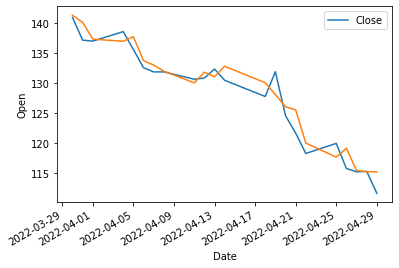

In [18]:
main()